# EDA and Feature Engineering for Stores

In [2]:
#from source.dataspark_constants import ROW_DATA_PATH , PROCESSED_DATA_PATH
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn.impute import SimpleImputer ,KNNImputer
import os

In [3]:

df = pd.read_csv(r'../Datasets/Stores.csv')
df

,Unnamed: 0,StoreKey,Country,State,Square Meters,Open Date,Category,Store Open Year
0,0,1,Australia,Australian Capital Territory,595.0,1/1/2008,Large,2008
1,1,2,Australia,Northern Territory,665.0,1/12/2008,Large,2008
2,2,3,Australia,South Australia,2000.0,1/7/2012,Extra-large,2012
3,3,4,Australia,Tasmania,2000.0,1/1/2010,Extra-large,2010
4,4,5,Australia,Victoria,2000.0,12/9/2015,Extra-large,2015
...,...,...,...,...,...,...,...,...
62,62,63,United States,Utah,2000.0,3/6/2008,Extra-large,2008
63,63,64,United States,Washington DC,1330.0,1/1/2010,Large,2010
64,64,65,United States,West Virginia,1785.0,1/1/2012,Large,2012
65,65,66,United States,Wyoming,840.0,1/1/2014,Large,2014


##### Describing Data

In [4]:
df.shape

(67, 8)

##### Identifying Misiing Values

In [5]:
df.isnull().sum()

Unnamed: 0         0
StoreKey           0
Country            0
State              0
Square Meters      1
Open Date          0
Category           1
Store Open Year    0
dtype: int64

In [6]:
df.fillna(0)

,Unnamed: 0,StoreKey,Country,State,Square Meters,Open Date,Category,Store Open Year
0,0,1,Australia,Australian Capital Territory,595.0,1/1/2008,Large,2008
1,1,2,Australia,Northern Territory,665.0,1/12/2008,Large,2008
2,2,3,Australia,South Australia,2000.0,1/7/2012,Extra-large,2012
3,3,4,Australia,Tasmania,2000.0,1/1/2010,Extra-large,2010
4,4,5,Australia,Victoria,2000.0,12/9/2015,Extra-large,2015
...,...,...,...,...,...,...,...,...
62,62,63,United States,Utah,2000.0,3/6/2008,Extra-large,2008
63,63,64,United States,Washington DC,1330.0,1/1/2010,Large,2010
64,64,65,United States,West Virginia,1785.0,1/1/2012,Large,2012
65,65,66,United States,Wyoming,840.0,1/1/2014,Large,2014


##### Creating New features

In [7]:
bins=[0,100,500,2000,float('inf')]
labels =['Small','Medium','Large','Extra-large']
df['Category'] = pd.cut(df['Square Meters'],bins=bins,labels=labels,right=False)
df['Store Open Year'] = pd.to_datetime(df['Open Date']).dt.year
df['Store Open Year']

0     2008
1     2008
2     2012
3     2010
4     2015
      ... 
62    2008
63    2010
64    2012
65    2014
66    2010
Name: Store Open Year, Length: 67, dtype: int32

## EDA

##### Store Counts

Text(0.5, 1.0, 'Year V/s Country')

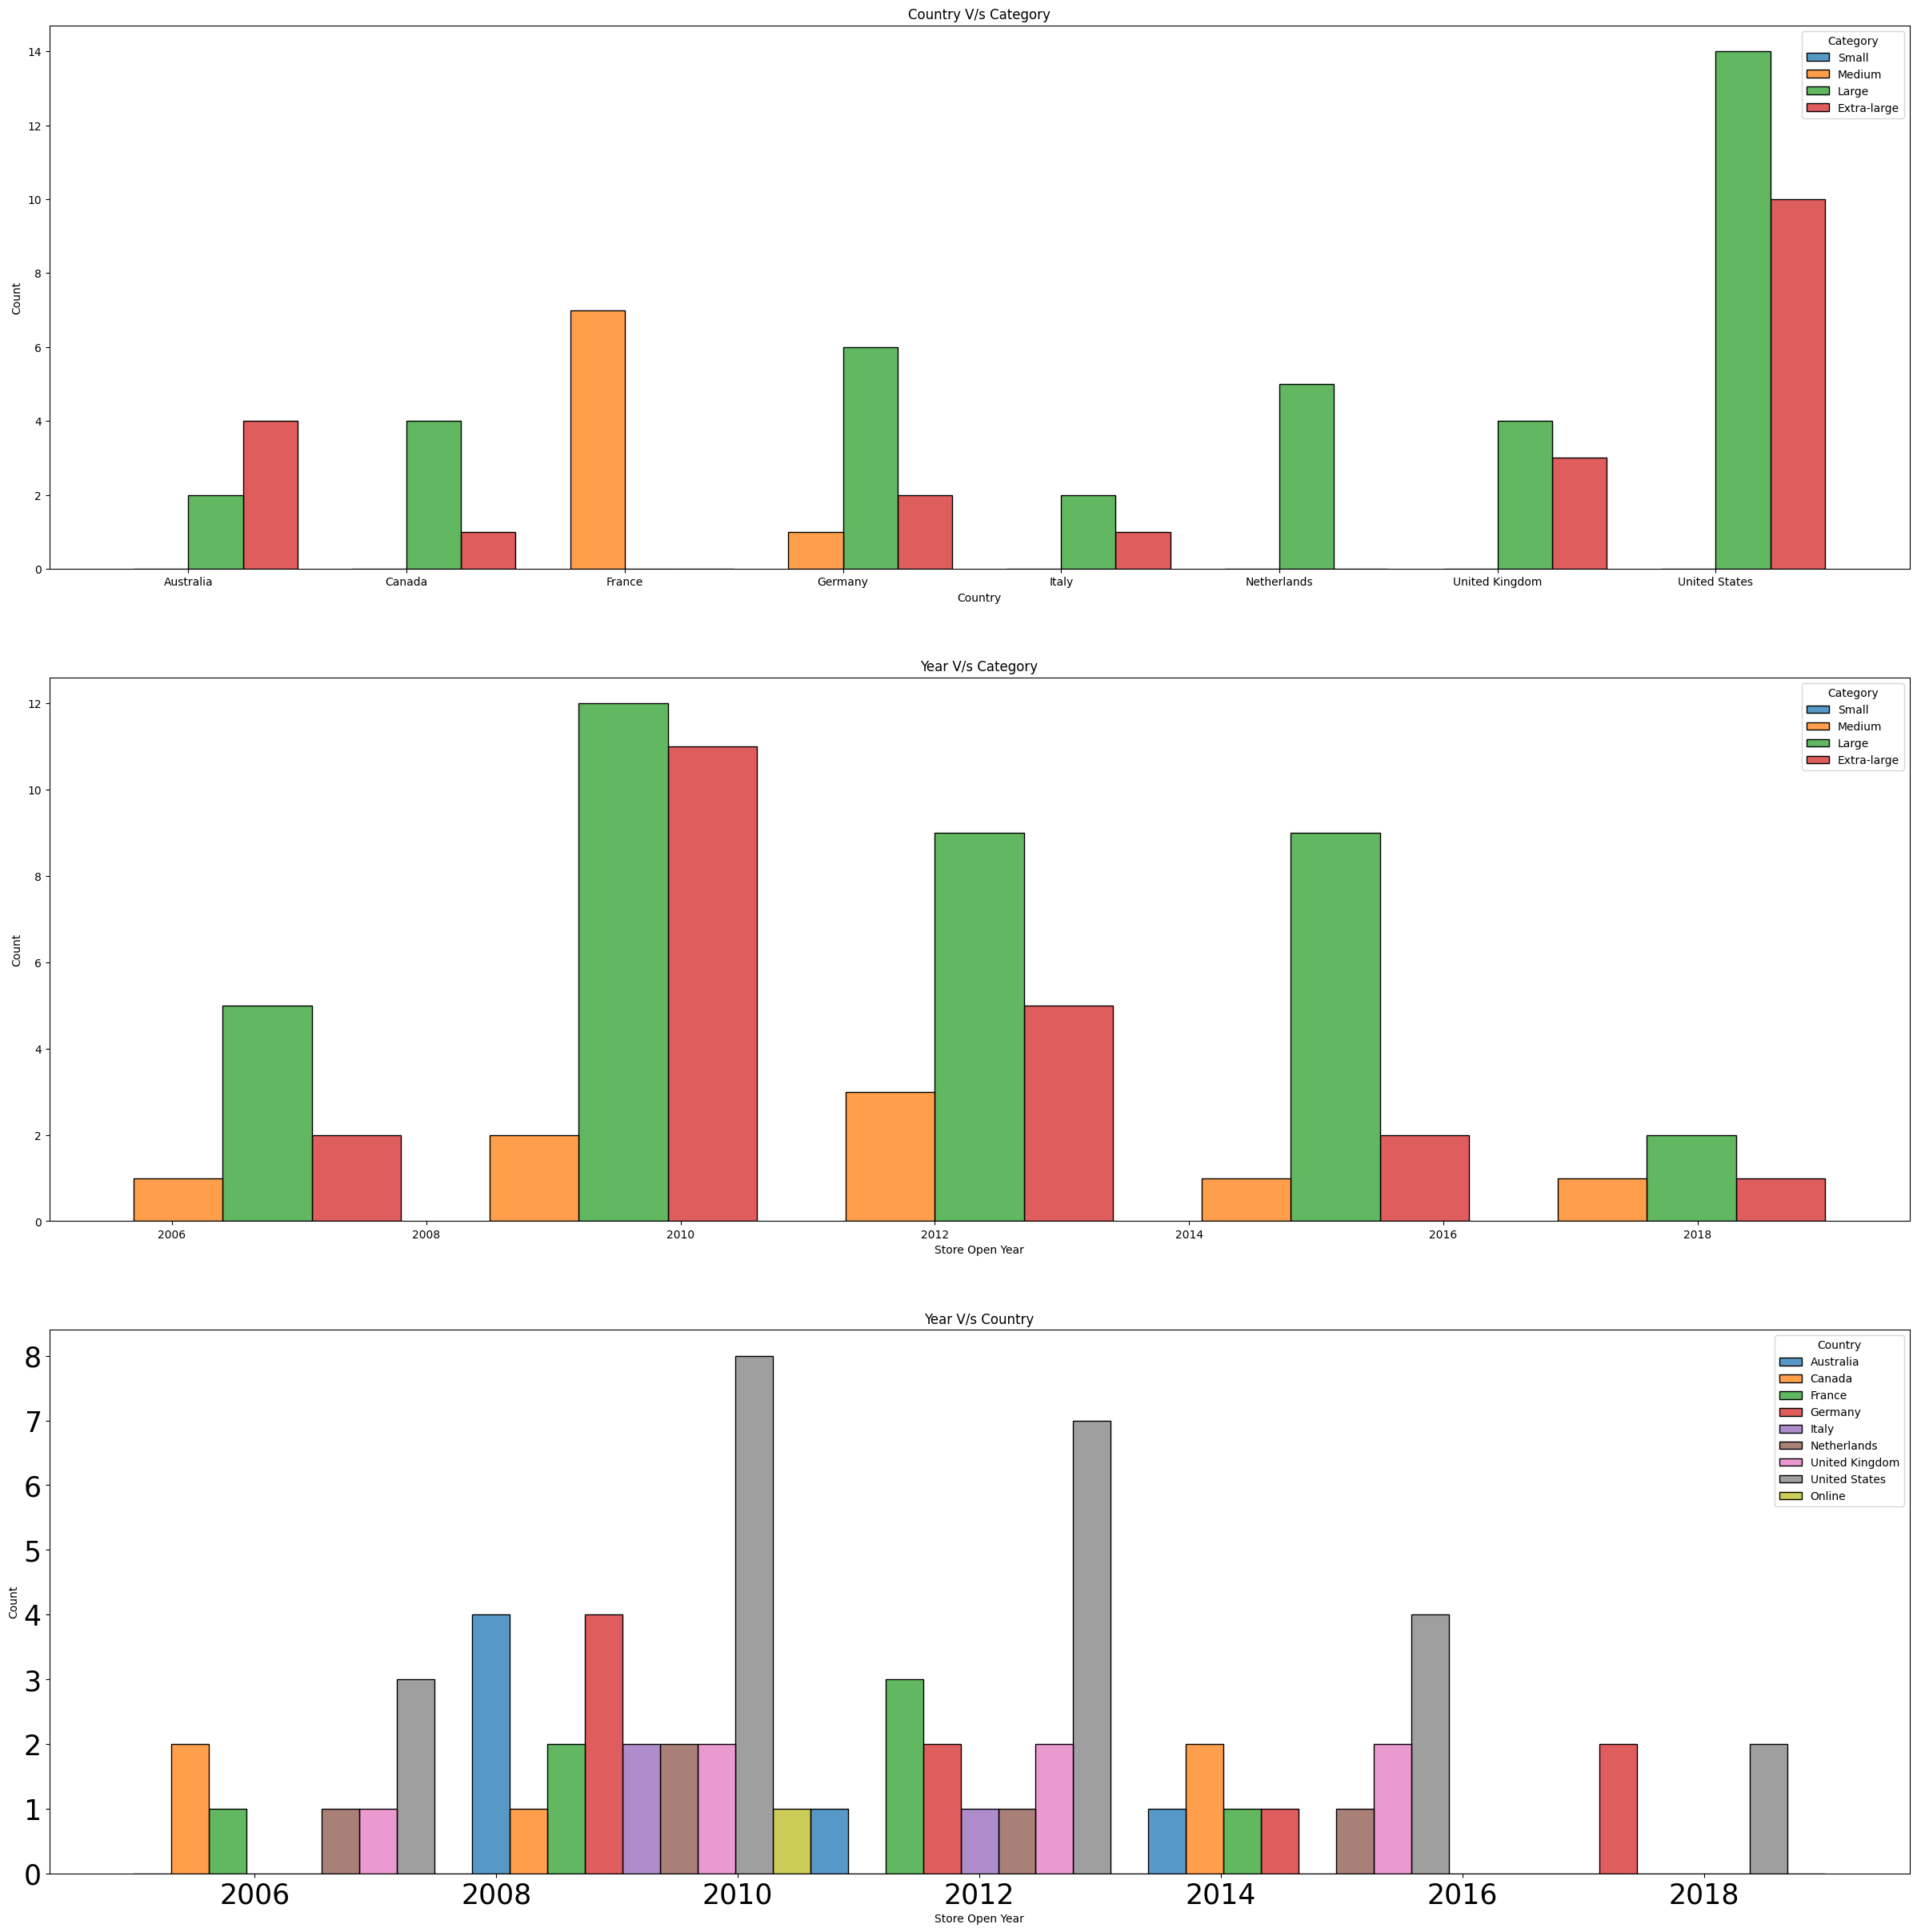

In [8]:
fig, axes = plt.subplots(3, 1, figsize=(30, 30))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
sns.histplot(data =df ,bins=5 ,x='Country',hue='Category',multiple='dodge' , ax=axes[0])
sns.histplot(data =df ,bins=5 ,x='Store Open Year',hue='Category',multiple='dodge',ax=axes[1])
sns.histplot(data =df ,bins=5 ,x='Store Open Year',hue='Country',multiple='dodge',ax=axes[2])
axes[0].set_title('Country V/s Category')
axes[1].set_title('Year V/s Category')
axes[2].set_title('Year V/s Country')

In [9]:

df.to_csv(r'../processed_data/Stores.csv')

In [10]:
store_count = df.groupby(['Country']).agg(Store_Count=('StoreKey', 'count')).reset_index()
store_count

,Country,Store_Count
0,Australia,6
1,Canada,5
2,France,7
3,Germany,9
4,Italy,3
5,Netherlands,5
6,Online,1
7,United Kingdom,7
8,United States,24
